#[Your_name]

<h1 style="text-align: center;">Text Classification<h1>

Prepare libraries

In [1]:
# here put every import you need e.g. import nltk
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv1D, AveragePooling1D, Flatten
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
import re
import numpy
from cleantext import clean
from arabicstopwords.stopwords_lexicon import stopwords_lexicon
import nltk
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display


download 

In [2]:
# !pip install Arabic-Stopwords
# 2.2 nltk.download('punkt') # open vpn
# 2.3 !pip install arabic-reshaper

Download data

In [3]:
# !wget 'https://drive.google.com/uc?export=download&id=1cMSjxa3nA706LIZDEhwMpaVRMY2IX9P0' -O 'data.zip'

In [4]:
# !unzip data.zip

<h2 dir="rtl">مثال عن كيفية تنظيف حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [5]:
# your code here


In [6]:
# example test

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Load the data

## [1.1]

In [7]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
validation_file_path = 'val.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
validation_data = pd.read_csv(validation_file_path)

print("number of data in train data : ",len(train_data))
print("number of data in test data : ",len(test_data))
print("number of data in validation data : ",len(validation_data))

number of data in train data :  52758
number of data in test data :  17586
number of data in validation data :  17586


In [8]:
train_data.head(10)

question  \
0  \nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...   
1  \nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...   
2              \nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...   
4  \nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...   
5  \nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...   
6  \nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...   
7  \nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...   
8  \nبالله عليكم امي اجريت عملية جراحية على فخذها...   
9  \nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...   

                                              answer                     label  
0  \n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...                      الدم  
1  \n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...  الاورام-الخبيثة-والحميدة  
2  \n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...                جراحة-عامة  
3  \n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...      أمراض-الجهاز-التنفسي  
4  \n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....                مرض-السكري  
5  \n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...                أمراض-الدم  
6  \n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...              الغدد-الصماء  
7  \n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...            الجهاز-التنفسي  
8  \n\nانها السيروما سائل من الانسجة بعد الجراحة ...           ارتفاع-ضغط-الدم  
9  \n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...        أمراض_الغدد_الصماء

In [9]:
test_data.head(10)

question  \
0  \nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...   
1  \nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...   
2  \nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...   
3  \nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...   
4  \nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...   
5  \nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...   
6  \nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...   
7  \nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...   
8  \nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...   
9  \nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...   

                                              answer                     label  
0  \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...                جراحة-عامة  
1  \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...           ارتفاع-ضغط-الدم  
2  \n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...      امراض_الجهاز_التنفسي  
3  \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...  الاورام-الخبيثة-والحميدة  
4  \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...           ارتفاع-ضغط-الدم  
5  \n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...        امراض الغدد الصماء  
6  \n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...                جراحة-عامة  
7  \n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...        امراض-الغدد-الصماء  
8  \n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...                جراحة-عامة  
9  \n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...                جراحة-عامة

In [10]:
validation_data.head(10)

question  \
0                 \nما هى الاعراض الاولى لمرض السكر    
1        \nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...   
3  \nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...   
4  \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...   
5  \nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...   
6  \nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...   
7  \nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...   
8  \nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...   
9  \nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...   

                                              answer                     label  
0  \n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...                جراحة عامة  
1  \n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...              جراحة_العظام  
2  \n\nهناك تغييرات عديدة في العمليات الحيوية لمو...           ارتفاع_ضغط_الدم  
3  \n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...        امراض-الغدد-الصماء  
4  \n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...      أمراض الجهاز التنفسي  
5  \n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...  الاورام الخبيثة والحميدة  
6  \n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...                جراحة_عامة  
7  \n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...                      الدم  
8  \n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...        امراض-الغدد-الصماء  
9  \n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...                امراض-الدم

In [11]:
#drop_duplicates يزيل الصفوف المتكرره
#dropna يحذف الصفوف المكررة
test_data=test_data.drop_duplicates().dropna()
train_data=train_data.drop_duplicates().dropna()
validation_data=validation_data.drop_duplicates().dropna()
print("number of data in train data after cleaning : ",len(train_data))
print("number of data in test data after cleaning : ",len(test_data))
print("number of data in validation data after cleaning : ",len(validation_data))

number of data in train data after cleaning :  32598
number of data in test data after cleaning :  11282
number of data in validation data after cleaning :  11341


In [12]:
train_data.head(10)

question  \
0  \nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...   
1  \nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...   
2              \nحلول منزلية لأعراض ارتفاع ضغط الدم    
3  \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...   
4  \nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...   
5  \nالسلام عليكم انا شاب 25 سنه وظهرلي زي كوره م...   
6  \nورمه قبل ثلاث سنوات كان حجمها ٣ انش ولاكن فج...   
7  \nعملت عن البواسير منذ شهر وعانيت خلال التبرز ...   
8  \nبالله عليكم امي اجريت عملية جراحية على فخذها...   
9  \nهل المشي بعد الأكل مباشرةً لمدة نصف ساعة مضر...   

                                              answer                     label  
0  \n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...                      الدم  
1  \n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...  الاورام-الخبيثة-والحميدة  
2  \n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...                جراحة-عامة  
3  \n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...      أمراض-الجهاز-التنفسي  
4  \n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....                مرض-السكري  
5  \n\nلا يمكن الإجابة على هذا السؤال بدون فحص يج...                أمراض-الدم  
6  \n\nالفحص سليم من عدا أمرين:\n١. تضخم بسيط وحم...              الغدد-الصماء  
7  \n\nلا يوحد مشكلة بالمشي. الاكثار من شرب السوا...            الجهاز-التنفسي  
8  \n\nانها السيروما سائل من الانسجة بعد الجراحة ...           ارتفاع-ضغط-الدم  
9  \n\nلا ينصح بممارسة الرياضة بعد الأكل مباشرة\n...        أمراض_الغدد_الصماء

In [13]:
test_data.head(10)

question  \
0   \nعندي الم مستمر داخل الشرج لا يوجد تشقق ولا ن...   
1   \nهل يمكن لثوم ان يخفض من الضغظ وماهي الجرعه ا...   
2   \nعملت فحص سكر الصائم بعد صيام اكثر من ١٢ساعة\...   
3   \nعملت ماموجرام وموجات فوق صوتيه فوجدت تضخم فى...   
4   \nقبل ثلاثة أسابيع أصبت بالتهابات القصبات الهو...   
5   \nعملت تحليل دم في الاسبوع ١٣ وخبرتني الدكتورة...   
6   \nاجرية عملية ناسور شرجي قبل ٨اشهر و لا زال يخ...   
7   \nكيف التوقف عن اخذ جرعات الثايروكسين ان كانت ...   
8   \nالسلام عليكم . يوجد لسع والم وتحجر وورم فى ث...   
10  \nالسلام عليكم. كان عندي شرخ مزمن وفي الاسبوع ...   

                                               answer  \
0   \n\nاخي الكريم استخدم أقراص مضادة للالتهاب Pon...   
1   \n\nنعم يمكن وهناك كثير من الدراسات التي تؤكد ...   
2   \n\nالنتيجة طبيعية\n2\n2023-06-03 08:16:44\n\n...   
3   \n\nيفضل طبعا عمل رنين لانه ادق بكثير لمعرفه ه...   
4   \n\nالعودة والكشف عند الطبيب لمعرفة اثار المرض...   
5   \n\nظهور السكر بالبول متوقع في الحمل الطبيعي و...   
6   \n\nالافضل مراجعة طبيبك الذي اجرى الجراحة للتق...   
7   \n\nممكن التوقف عنها مرة واحدة ولكن يفضل بالتن...   
8   \n\nراجع جراحك ولا خوف\n0\n2023-06-05 15:01:48...   
10  \n\nالالم عادي بعد الجراحة. يتحسن تدريجيا\n0\n...   

                       label  
0                 جراحة-عامة  
1            ارتفاع-ضغط-الدم  
2       امراض_الجهاز_التنفسي  
3   الاورام-الخبيثة-والحميدة  
4            ارتفاع-ضغط-الدم  
5         امراض الغدد الصماء  
6                 جراحة-عامة  
7         امراض-الغدد-الصماء  
8                 جراحة-عامة  
10                جراحة-عامة

In [14]:
validation_data.head(10)

question  \
0                 \nما هى الاعراض الاولى لمرض السكر    
1        \nكيف يمكن علاج الناسور العصعصي بدون جراحة    
2  \nماهي الاثار الجانبية لستئصال الغده الدرقيه ع...   
3  \nلدى نقص بهرمون الذكورة ووصف لدى الدكتور حقت ...   
4  \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...   
5  \nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...   
6  \nعمر 54 الضغط طبيعي وزني 74 طولي 162 مصاب بال...   
7  \nعملت اتستصال للفص الايمن من الدرقية. الحمدلل...   
8  \nبعد عمل تحليل للغدة الدرقية قررت الدكتورة ال...   
9  \nسلام عليكم اشكرك كتير علي اهتمامك لموضوعي وا...   

                                              answer                     label  
0  \n\nأعراض مرض السكر كثيره أهمها العطش كثرة ادر...                جراحة عامة  
1  \n\nعلاج الناسور العصعصي يكون بالجراحة فقط\n0\...              جراحة_العظام  
2  \n\nهناك تغييرات عديدة في العمليات الحيوية لمو...           ارتفاع_ضغط_الدم  
3  \n\nيجب اتباع التعليمات الطبية و عدم وقف العلا...        امراض-الغدد-الصماء  
4  \n\nمرحبا،\nبعد العملية، يمكن أن يحدث بعض الأع...      أمراض الجهاز التنفسي  
5  \n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...  الاورام الخبيثة والحميدة  
6  \n\nمين قالك تاخذ B12 ما هي بالمزاج ولا بالكيف...                جراحة_عامة  
7  \n\nتورم الجرح بعد الجراحه امر طبيعى وقد يستمر...                      الدم  
8  \n\nنعم يجب تقليل الجرعة وفعلها صحيح\n1\n2021-...        امراض-الغدد-الصماء  
9  \n\nكما شرحت لك الخطورة تعتمد على وضع كل مريض ...                امراض-الدم

## [1.2]

In [15]:
def unify_specialty(name):
    name = re.sub(r"[^\w\s]", " ", name)  # يزيل الرموز الترقيمية
    name = re.sub(r"\s+", " ", name).strip()  # يزيل الفراغات المتكرره #strip يزيل الفراغات يلي بالبداية والنهاية
    name =re.sub("[\_\-]"," ",name)
    return name

train_data['label']=train_data['label'].apply(unify_specialty)
test_data['label']=test_data['label'].apply(unify_specialty)
validation_data['label']=validation_data['label'].apply(unify_specialty)   


In [16]:
x=set(train_data['label'])
x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الاورام الخبيثة والحميدة',
 'الجهاز التنفسي',
 'الدم',
 'السكري',
 'الغدد الصماء',
 'امراض الجهاز التنفسي',
 'امراض الدم',
 'امراض الغدد الصماء',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

In [17]:
Dictionary_of_diseases= {
    'أمراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'امراض الجهاز التنفسي': 'أمراض الجهاز التنفسي',
    'أمراض الدم': 'أمراض الدم',
    'الدم': 'أمراض الدم',
    'امراض الدم': 'أمراض الدم',
    'أمراض الغدد الصماء': 'أمراض الغدد الصماء',
    'الغدد الصماء': 'أمراض الغدد الصماء',
    'امراض الغدد الصماء': 'أمراض الغدد الصماء',
    'مرض السكري': 'مرض السكري',
    'السكري': 'مرض السكري',
    'الاورام الخبيثة والحميدة':'الأورام الخبيثة والحميدة'

}

def Unification_name_of_diseases(c):
    c=c.map(Dictionary_of_diseases).fillna(c)
    return c

In [18]:
train_data['label']=Unification_name_of_diseases(train_data['label'])
test_data['label']=Unification_name_of_diseases(test_data['label'])
validation_data['label']=Unification_name_of_diseases(validation_data['label'])

In [19]:
x=set(train_data['label'])
x

{'أمراض الجهاز التنفسي',
 'أمراض الدم',
 'أمراض الغدد الصماء',
 'ارتفاع ضغط الدم',
 'الأورام الخبيثة والحميدة',
 'جراحة العظام',
 'جراحة عامة',
 'مرض السكري'}

# Question [2]: Text Analysis

## [2.1] 


In [20]:
train_data


question  \
0      \nما هي مميزات و عيوب الدواء جلوكوفانس 500 5 و...   
1      \nاليك نتيجة تحليل هرمونات الغدة الدرقية علما ...   
2                  \nحلول منزلية لأعراض ارتفاع ضغط الدم    
3      \nعملت عملية دوالي الساقين قسطرة الليزر من شهر...   
4      \nما حقيقة ان تمرين العضلة النعلية يخفض السكر ...   
...                                                  ...   
52748  \nالسلام عليكم\nانا عمري ٣٩ سنه عملت تحاليل طل...   
52750  \nدكتور انا برضع طبيعي وحسيت ان فى صدرى الايمن...   
52754  \nهل يمكن ان يرتفع السكر الى 570 دون اعراض مع ...   
52755  \nهل يمكن علاج سرطان الثدى المرحله الثانيه فى ...   
52757  \nتم تركيب شريحه و٧ مساميرفي العضد. التئم الكس...   

                                                  answer  \
0      \n\nلكل علاج ايجابيته وسلبياته والتي تعتمد على...   
1      \n\nنعم. يجب تخفيض الجرعة، الا اذا كان سبب است...   
2      \n\nيفضل عدم الاستغناء عن العلاج الدوائي لمرضى...   
3      \n\nراجع طبيبك من اجري الجراحه افضل من يجيب لا...   
4      \n\nإذا قصدت تدليك العضلة فهذا كلام غير صحيح ....   
...                                                  ...   
52748  \n\nلاعلاقة لنقص الفيتامين D أو B12 بالتوتر . ...   
52750  \n\nفي الغالب تكون هذه غدة حليبية. اذا كان الأ...   
52754  \n\nليس بالضرورة وجود اعراض ويجب المتابعة عن ط...   
52755  \n\nطبعاً هناك بروتوكول يجب إتباعه. ولكنه بالن...   
52757  \n\nهذا يعتمد على الوزن اذا كان الوزن كبيراً و...   

                          label  
0                    أمراض الدم  
1      الأورام الخبيثة والحميدة  
2                    جراحة عامة  
3          أمراض الجهاز التنفسي  
4                    مرض السكري  
...                         ...  
52748        أمراض الغدد الصماء  
52750  الأورام الخبيثة والحميدة  
52754                مرض السكري  
52755  الأورام الخبيثة والحميدة  
52757              جراحة العظام  

[32598 rows x 3 columns]

In [21]:
# Train data

# عدد الأجوبة الخاصة بأمراض الدم :
answers_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['answer'].tolist())
# print(answers_len_in_blood_diseases)

# عدد الأسئلة الخاصة بأمراض الدم :
questions_len_in_blood_diseases = len(train_data[train_data['label']=='أمراض الدم']['question'].tolist())
# print(questions_len_in_blood_diseases)


# عدد الداتا الخاصة بأمراض الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الدم'])
print('عدد الداتا الخاصة بأمراض الدم:',total_blood_diseases_len)

# عدد الداتا في أمراض الجهاز التنفسي :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الجهاز التنفسي'])
print('عدد الداتا الخاصة بأمراض الجهاز التنفسي:',total_blood_diseases_len)

# غدد الداتا في أمراض الغدد الصماء :
total_blood_diseases_len = len(train_data[train_data['label']=='أمراض الغدد الصماء'])
print('عدد الداتا الخاصة بأمراض الغدد الصماء:',total_blood_diseases_len)

# عدد  الداتا ارتفاع ضغط الدم :
total_blood_diseases_len = len(train_data[train_data['label']=='ارتفاع ضغط الدم'])
print('عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم:',total_blood_diseases_len)

# عدد الداتا في الأورام الخبيثة والحميدة :
total_blood_diseases_len = len(train_data[train_data['label']=='الأورام الخبيثة والحميدة'])
print('عدد الداتا الخاصة بالأورام الخبيثة والحميدة:',total_blood_diseases_len)

# عدد الداتا في جراحة العظام
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة العظام'])
print('عدد الداتا الخاصة بجراحةالعظام:',total_blood_diseases_len)

# عدد الداتا في الجراحة العامة
total_blood_diseases_len = len(train_data[train_data['label']=='جراحة عامة'])
print('عدد الداتا الخاصة بالجراحة العامة:',total_blood_diseases_len)

# عدد الداتا في مرض السكري
total_blood_diseases_len = len(train_data[train_data['label']=='مرض السكري'])
print('عدد الداتا الخاصة بمرض السكري:',total_blood_diseases_len)


عدد الداتا الخاصة بأمراض الدم: 1398
عدد الداتا الخاصة بأمراض الجهاز التنفسي: 3676
عدد الداتا الخاصة بأمراض الغدد الصماء: 5752
عدد الداتا الخاصة بأمراض ارتفاع ضغط الدم: 2537
عدد الداتا الخاصة بالأورام الخبيثة والحميدة: 6449
عدد الداتا الخاصة بجراحةالعظام: 2211
عدد الداتا الخاصة بالجراحة العامة: 6307
عدد الداتا الخاصة بمرض السكري: 4268


                  Specialization  Number of Texts
0                 Blood Diseases             1398
1    Respiratory System Diseases             3676
2             Endocrine Diseases             5752
3                   Hypertension             2537
4  Malignant and Benign Diseases             6449
5             Orthopedic Surgery             2211
6                General Surgery             6307
7                       Diabetes             4268


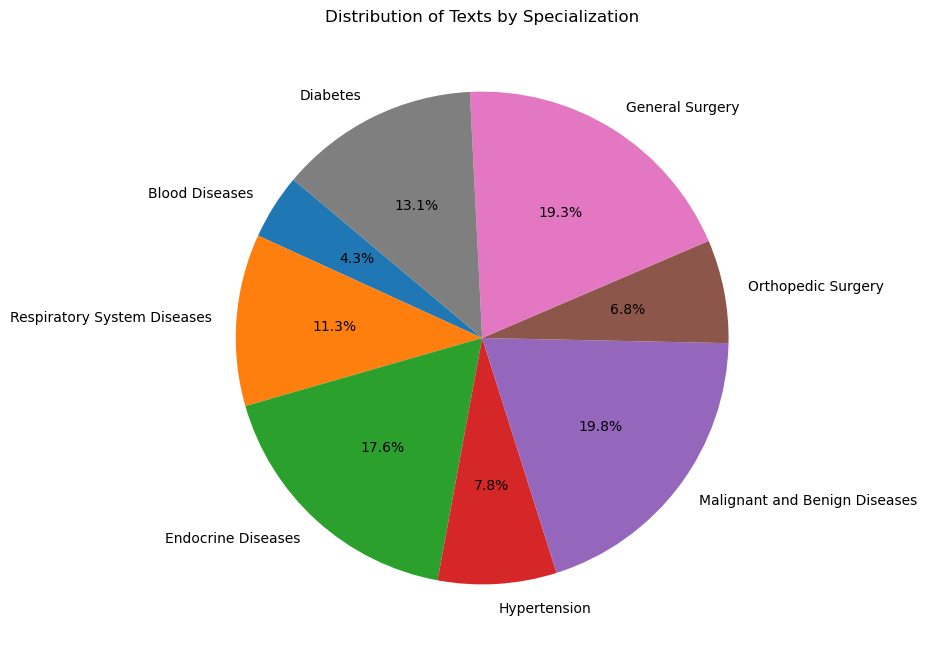

In [33]:
# Drawing pie chart:
# ملاحظة بالعربي طلع الخط مفشكل ف تمت الكتابة بالانكليزي



# data = {
#     'الاختصاص': ['أمراض الدم', 'أمراض الجهاز التنفسي', 'أمراض الغدد الصماء','أمراض ارتفاع ضغط الدم','الأمراض الخبيثة والحميدة','جراحةالعظام','الجراحة العامة','مرض السكري'],
#     'عدد النصوص': [2153, 6002, 9417,4190,10711,2641,10548,7096]
# }

# data


# df = pd.DataFrame(data)

# print(df)

# plt.figure(figsize=(8, 8))
# plt.pie(df['عدد النصوص'], labels=df['الاختصاص'], autopct='%1.1f%%', startangle=140)
# plt.title('توزيع النصوص حسب الاختصاص')
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Specialization': ['Blood Diseases', 'Respiratory System Diseases', 'Endocrine Diseases', 'Hypertension', 'Malignant and Benign Diseases', 'Orthopedic Surgery', 'General Surgery', 'Diabetes'],
    'Number of Texts': [1398, 3676, 5752, 2537, 6449, 2211, 6307, 4268]
}

df = pd.DataFrame(data)

print(df)

plt.figure(figsize=(8, 8))
plt.pie(df['Number of Texts'], labels=df['Specialization'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Texts by Specialization')
plt.show()


## [2.2] 

In [23]:
def delete_repeated_letter(text):
    # cleaned_text = re.sub(r'(.)\1{2,}', r'\1', text)
    cleaned_text = re.sub(r'([^\w\s\.])\1+', r'\1', text)
    cleaned_text = re.sub(r'(\.\s*)\1+$', r'\1', cleaned_text)
    return cleaned_text

def handle_connected_words(tokenized):
    # Handle connected words with '-'
    result_tokens = []
    for token in tokenized:
        # Split connected words with '-'
        result_tokens.extend(token.split('-'))
    return result_tokens


def filter_text(list):
    list_of_phrases =[]
    all_tokens = []
    for sentence in list:
        tokenizer = RegexpTokenizer(r'\b\d+\b|\b[^\d\W_]{2,}\b|[^\d\W_]+(?:-[^\d\W_]+)?|\S')
        tokenized = tokenizer.tokenize(delete_repeated_letter(sentence))
        tokenized = handle_connected_words(tokenized)

        # Remove '-' and '/' and one-letter words from each token
        # cleaned_tokens = [token for token in tokenized if len(token) > 1 and token not in ['-', '/']]
        cleaned_tokens = [token if len(token) > 1 or token == 'و' else '' for token in tokenized if token not in ['-', '/']]

        combined_phrase = ' '.join(cleaned_tokens)
        list_of_phrases.append(combined_phrase)

    for phrase in list_of_phrases:
        tokens = nltk.word_tokenize(phrase)
        all_tokens.append(tokens)
        
    return all_tokens



In [24]:
train_data_answers_list = train_data['answer'].values
answers = filter_text(train_data_answers_list)
print(answers[:5])


[['لكل', 'علاج', 'ايجابيته', 'وسلبياته', 'والتي', 'تعتمد', 'على', 'حالة', 'المريض', 'فما', 'قد', 'يناسب', 'احدهم', 'قد', 'لا', 'يناسب', 'الاخر', 'وهذا', 'يحدده', 'الطبيب', 'خلال', 'مراجعة', 'المريض', 'له', '2015', '01', '04', '20', '08', '51', 'الدكتور', 'يزن', 'علي', 'خليف', 'اسئلة', 'طبية', 'مرض', 'السكري', 'ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', 'و', 'ايضا', 'الانسولين', '351157', 'الدكتور', 'يزن', 'علي', 'خليف', 'الغدد', 'الصماء'], ['نعم', 'يجب', 'تخفيض', 'الجرعة', 'الا', 'اذا', 'كان', 'سبب', 'استئصال', 'الغدة', 'هو', 'سرطان', 'الغدة', '2017', '02', '13', '06', '34', '19', 'الدكتور', 'باسم', 'مرقص', 'اسئلة', 'طبية', 'امراض', 'الغدد', 'الصماء', 'اليك', 'نتيجة', 'تحليل', 'هرمونات', 'الغدة', 'الدرقية', 'علما', 'بانه', 'تم', '909154', 'الدكتور', 'باسم', 'مرقص', 'جراحة', 'عامة'], ['يفضل', 'عدم', 'الاستغناء', 'عن', 'العلاج', 'الدوائي', 'لمرضى', 'الضغط', 'لكن', 'يعد', 'النظام', 'الغذائي', 'و', 'الحركي', 'اليومي', 'للمريض', 'جزء', 'مهم', 'و', 'أساسي', 'في', 'الحفاظ', 'على

In [25]:
train_data_questions_list = train_data['question'].values
questions = filter_text(train_data_questions_list)
print(questions[:5])

[['ما', 'هي', 'مميزات', 'و', 'عيوب', 'الدواء', 'جلوكوفانس', '500', 'و', 'ايضا', 'الأنسولين', 'مكس', 'تارد', '30'], ['اليك', 'نتيجة', 'تحليل', 'هرمونات', 'الغدة', 'الدرقية', 'علما', 'بانه', 'تم', 'استأصال', 'الغدة', 'منذ', 'اكثر', 'من', 'سنتينTT', 'TT', '12', 'TSH', '01', 'هل', 'مطلوب', 'تعديل', 'الجرعة'], ['حلول', 'منزلية', 'لأعراض', 'ارتفاع', 'ضغط', 'الدم'], ['عملت', 'عملية', 'دوالي', 'الساقين', 'قسطرة', 'الليزر', 'من', 'شهر', 'وعندي', 'الم', 'من', 'اسفل', 'ساق', 'الى', 'اعلى', 'ساق', 'و', 'برودة', 'اطراف', 'القدم', 'وحرقان', 'وخز', 'و', 'امكان', 'يابسة', 'وحكة', 'و', 'طيبة', 'عليا', 'هل', 'هدا', 'طبيعي', 'احس', 'في', 'سكين', 'تقطع'], ['ما', 'حقيقة', 'ان', 'تمرين', 'العضلة', 'النعلية', 'يخفض', 'السكر', 'بالدم']]


In [26]:
# حساب عدد الكلمات الكلي :
total_words_len = len(questions) + len(answers)
print(total_words_len)

65196


In [27]:
# حساب عدد الكلمات الفريدة :

for question, answer in zip(questions, answers):
    unique_words_question = set(question)
    unique_words_answer = set(answer)

    
total_unique_words = len(unique_words_question) + len(unique_words_answer)
print("عدد الكلمات الفريدة:", total_unique_words)
# مالي متأكد منو بس


عدد الكلمات الفريدة: 90


## [2.3] 

In [28]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# from arabic_reshaper import arabic_reshaper
# from bidi.algorithm import get_display

# # Example text (replace this with your actual training data)
# arabic_text = "الكلمة الأولى الكلمة الثانية الكلمة الثالثة الكلمة الرابعة"

# # Reshape Arabic text for proper display
# reshaped_text = arabic_reshaper.reshape(arabic_text)
# display_text = get_display(reshaped_text)

# # Generate Word Cloud
# wordcloud = WordCloud(font_path='fonts/Marhey/Marhey-VariableFont_wght.ttf', background_color='white').generate(display_text)

# # Display the generated word cloud using matplotlib
# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()


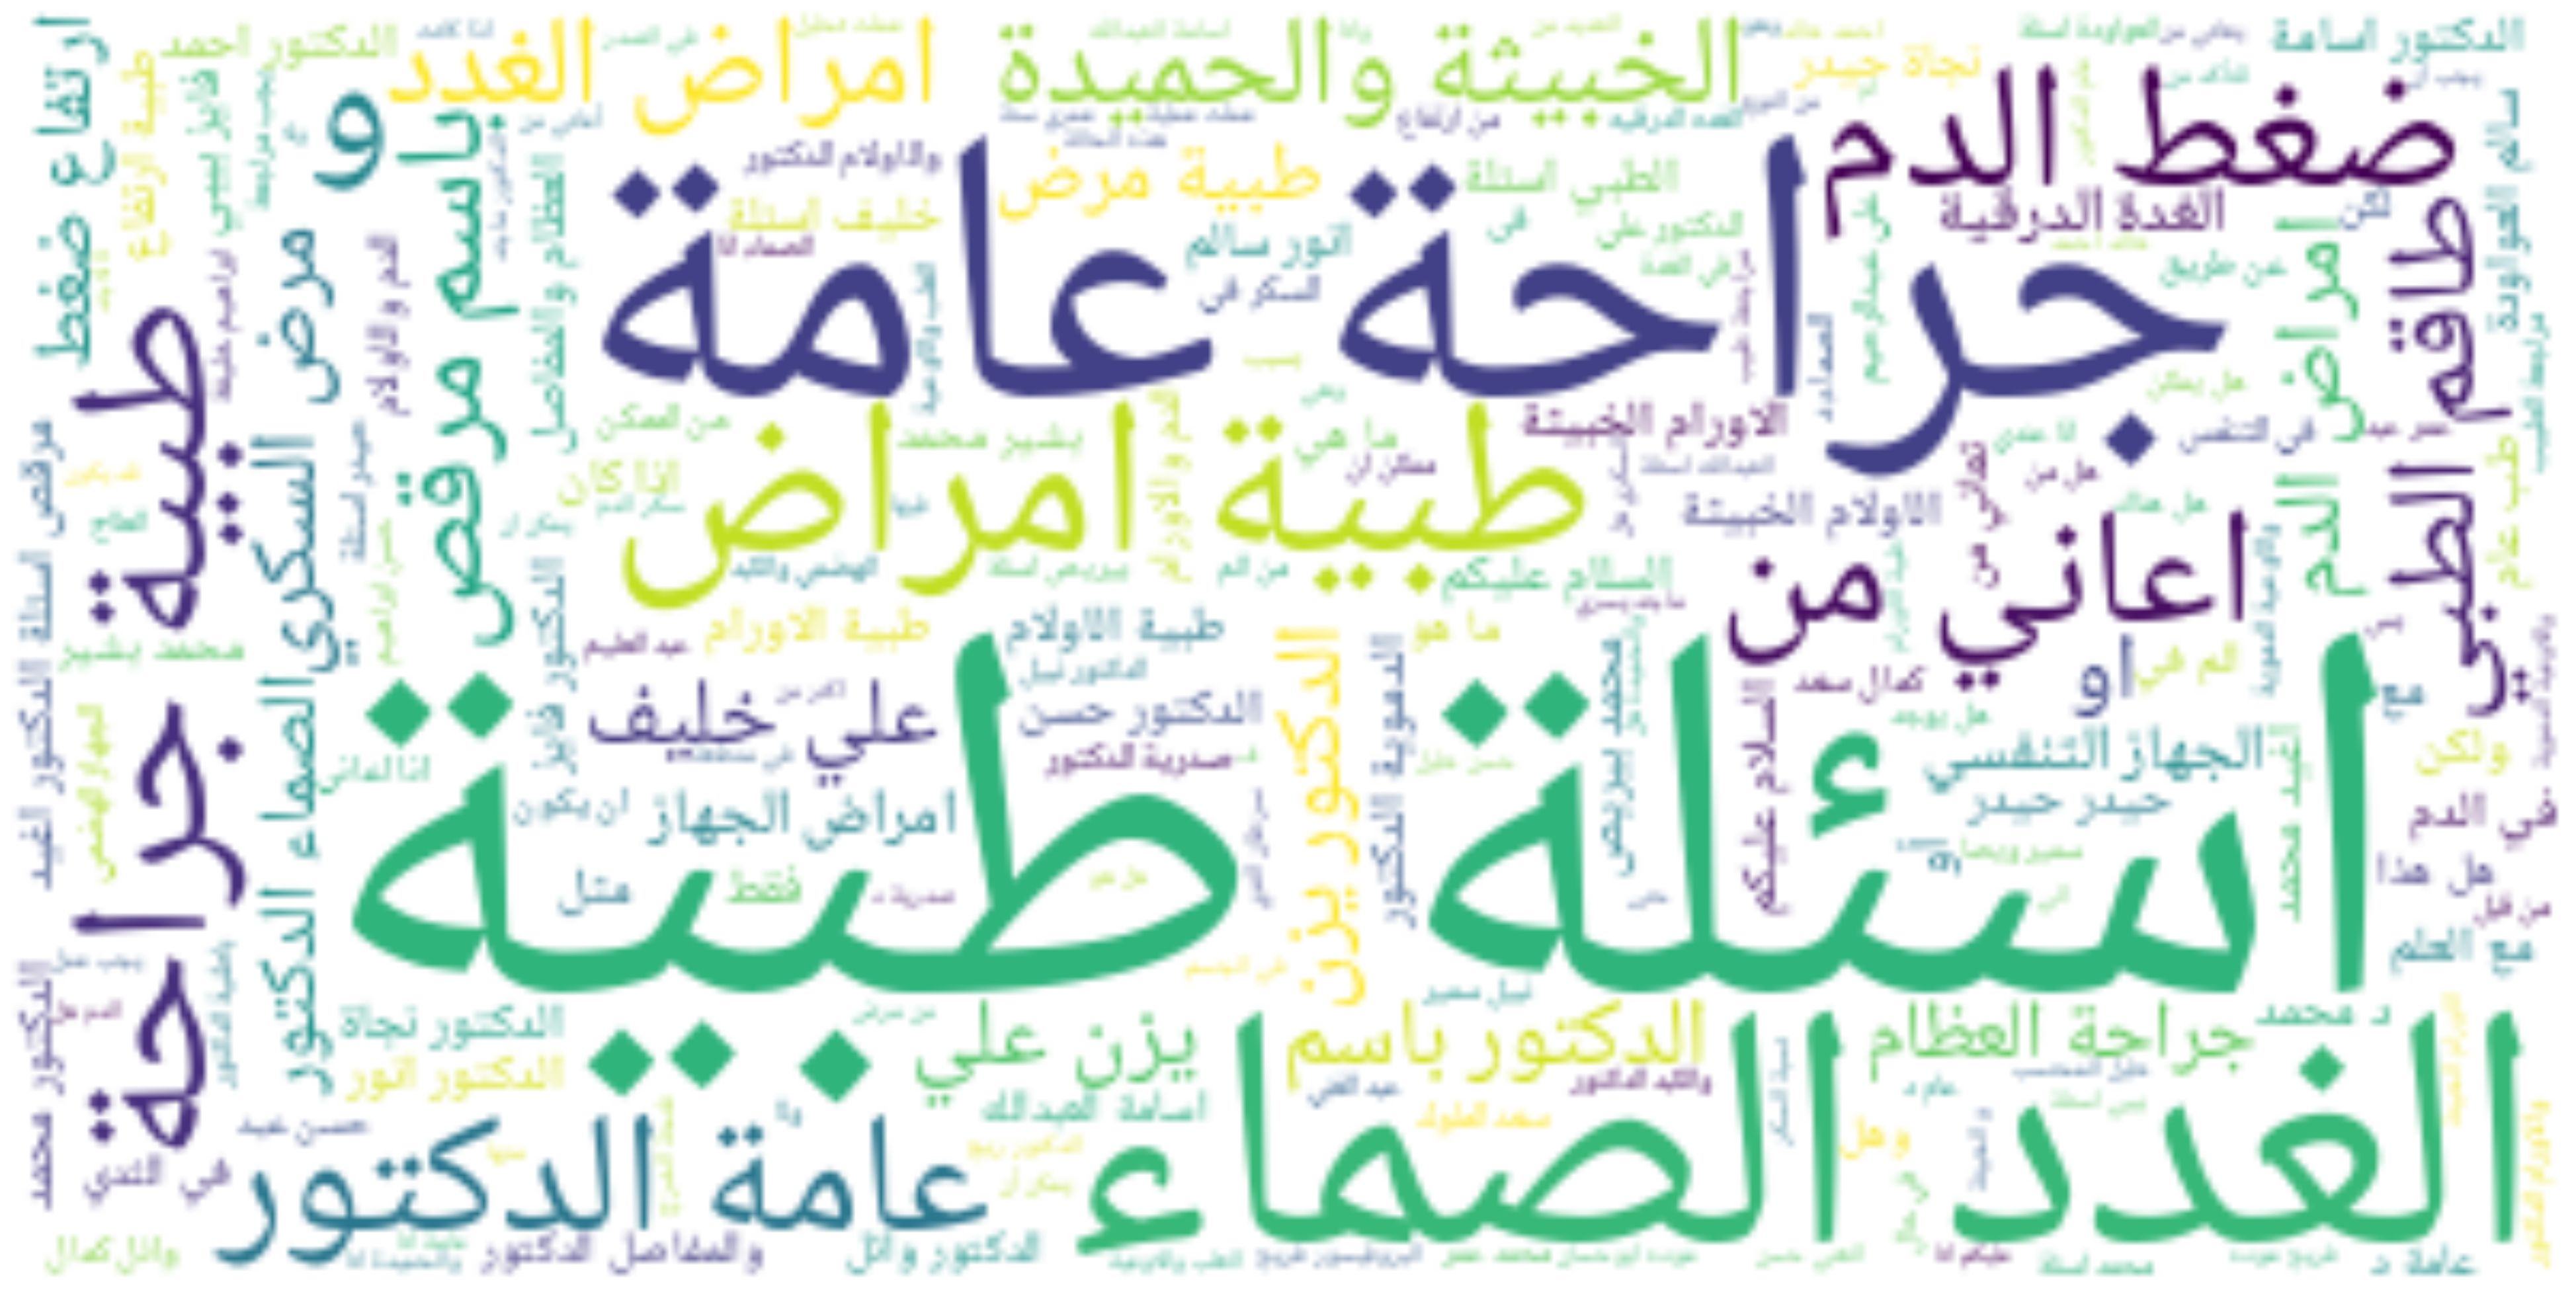

In [38]:
WCD=dict()
train_data_answers_list = train_data['answer'].values
train_data_questions_list = train_data['question'].values
train_data_list=train_data_answers_list+train_data_questions_list
answers_text = ' '.join(train_data_list)
reshaped_text = arabic_reshaper.reshape(answers_text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(font_path='font/NotoNaskhArabic-VariableFont_wght.ttf', background_color='white').generate(arabic_text)
WCD=wordcloud.words_
plt.figure(figsize=(50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## [2.4] 

## [2.5] 

# Question [3]: Text Cleaning and Normalization

## [3.1] 


## [3.2] 

## [3.3] 

## [3.4] 

## [3.5]

### [3.5.1] 

### [3.5.2] 

### [3.5.3] 

### [3.5.4]

## [3.6] 

### [3.6.1] 

### [3.6.2] 

## [3.7] 

## [3.8] 

## [3.9] 

### [3.9.1] 

### [3.9.2] 

### [3.9.3] 

### [3.9.4] 

## [3.10] 

## Extra [3.11]

# Question [4]: Prepare Training Data

## [4.1] 


## [4.2] 

## [4.3] 

## [4.4] 

# Question [5]: Baseline

The Comparison Dictionary example

In [30]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [31]:
comparison_table['question_step_number'].append("3.5")
comparison_table['model_name'].append('logistic_regression')
comparison_table['features'].append('bag of words')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("remove links")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(balance_accuracy_value)

NameError: name 'accuracy' is not defined

## [5.1]

## [5.2]

## [5.3]

## [5.4]

## [5.5]

## [5.6]

# Question [6]: Semantic Representation

## [6.1]

## [6.2]

## [6.3]

## [6.4]

## [6.5]

# Question [7]: Deep Neural Network

## [7.1]

### [7.1.1]

### [7.1.2]

## [7.2]

### [7.2.1]

### [7.2.2]

### [7.2.3]

### [7.2.4]

## [7.3]

## Extra [7.4]

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)